# Import data

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
# upload the dataset to google colab
#import data
from google.colab import files
import io
uploads = files.upload()
df = pd.read_excel(io.BytesIO(uploads["Data_Dogfood_Sales_2022.xls"]))



Saving Data_Dogfood_Sales_2022.xls to Data_Dogfood_Sales_2022.xls


In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/AmazonCapstone/dogfood_sales.csv")
# df = pd.read_excel("C:\\Users\\88609\\OneDrive - Emory University\\Desktop\\Courses\\Spring Semester\\ISOM-689 Capstone Project\\data\\Data_Dogfood_Sales_2022.xlsx")
print(df)

      sale_id   sale_date                     ad_exp  product_id  \
0           1  2022-01-01         Sponsored Products   224143037   
1           2  2022-01-01  Don't recall seeing an ad   834182030   
2           3  2022-01-01  Don't recall seeing an ad   950844039   
3           4  2022-01-01         Sponsored Products   378059009   
4           5  2022-01-01  Don't recall seeing an ad   151595003   
...       ...         ...                        ...         ...   
9210     9211  2022-12-31  Don't recall seeing an ad   644028013   
9211     9212  2022-12-31  Don't recall seeing an ad   123910010   
9212     9213  2022-12-31  Don't recall seeing an ad   810662032   
9213     9214  2022-12-31          Display/banner ad   208949071   
9214     9215  2022-12-31         Sponsored Products   633224070   

        product_brand                                       product_name  \
0     Seattle Gourmet  Seattle Gourmet Adult 7+ Small Bites Chicken M...   
1       Garland Farms  Garland 

In [ ]:
#create new column call purchase, and set original data(those already made purchase) as "1"
df['purchase'] = 1

#create column calls sales, times the unit price with quantity
df['sales'] = df['price'] * df['qty']

# Create price index

In [ ]:
#check average price of each brand
# Create a dictionary to store the average price for each brand
from statistics import mean
df_avg = df.groupby("product_brand")["price"].mean()
print(df_avg.sort_values(ascending=False))

product_brand
Perro              105.635263
Playtime            86.621111
K99                 73.333548
Hanover             59.219730
Doggo               57.492857
Beethoven           55.417778
Garland Farms       54.433853
Ruby                53.847192
King                48.005773
Alpha               46.534357
Rivera              44.518226
Bezt                37.474453
Seattle Gourmet     35.023894
Beam                32.800238
Top                 32.309375
Kastle              31.975556
Astro               31.645426
Health One          29.720094
Hearth              27.922000
Pawsome             27.780612
Romero              27.667692
Bones               26.021000
Arf                 23.114101
Spot's Choice       19.485529
Oh My Dog!          18.800000
Name: price, dtype: float64


In [ ]:
#assign average price for total dataset
average_price = df_avg.mean()
print(average_price)

43.471986312078315


In [ ]:
#calculate the index of each brand, index calculation: (brand price / average_price) * 100
df_avg_index = (df_avg / average_price) *100
print(df_avg_index)

product_brand
Alpha              107.044470
Arf                 53.170105
Astro               72.794984
Beam                75.451436
Beethoven          127.479286
Bezt                86.203683
Bones               59.856938
Doggo              132.252657
Garland Farms      125.215932
Hanover            136.225038
Health One          68.366082
Hearth              64.229869
K99                168.691506
Kastle              73.554393
King               110.429214
Oh My Dog!          43.246241
Pawsome             63.904631
Perro              242.996173
Playtime           199.257311
Rivera             102.406698
Romero              63.644877
Ruby               123.866417
Seattle Gourmet     80.566583
Spot's Choice       44.823186
Top                 74.322288
Name: price, dtype: float64


# Create sub-category

In [ ]:
# create new column call "category"
df['category'] = None

# change all product_name into lower (to extract insight from it)
df['product_name'] = df['product_name'].str.lower()

In [ ]:
# define function to extract insight from product name
def categorize_product_description(product_name):
    if "freeze" in product_name and "dried" in product_name:
        return "Freeze-dried dog food"
    elif "dehydrated" in product_name:
        return "Dehydrated dog food"
    elif "wet" in product_name:
        return "Wet dog food"
    elif "diet" in product_name:
        return "Veterinary dog food"
    else:
        return "Dried dog food"

In [ ]:
# apply the function into dataset and change category column based on the definition
df['category'] = df['product_name'].apply(categorize_product_description)

# check if there any column does not change successfully
df['category'].isnull().sum()

0

In [ ]:
## check the number of distinct product in each category ##

# check how many distinct product in each category
category_counts = df.groupby('category')['product_name'].nunique()
category_counts = category_counts.sort_values(ascending=False)

# Calculate the proportion of sales for each category
category_proportions = category_counts / category_counts.sum()

# Display the category sales and proportions
print(category_counts)
print(category_proportions)

category
Dried dog food           79
Wet dog food              9
Veterinary dog food       2
Dehydrated dog food       1
Freeze-dried dog food     1
Name: product_name, dtype: int64
category
Dried dog food           0.858696
Wet dog food             0.097826
Veterinary dog food      0.021739
Dehydrated dog food      0.010870
Freeze-dried dog food    0.010870
Name: product_name, dtype: float64


In [ ]:
# check how each brand's distribution of product category

# Group by category, brand, and count the number of distinct products in each category-brand combination
category_brand_counts = df.groupby(['category', 'product_brand'])['product_name'].nunique()

print(category_brand_counts)

category               product_brand  
Dehydrated dog food    Bones               1
Dried dog food         Alpha              14
                       Arf                 7
                       Astro               2
                       Beam                3
                       Beethoven           2
                       Bezt                9
                       Doggo               1
                       Garland Farms       6
                       Hanover             1
                       Health One          7
                       Hearth              1
                       K99                 1
                       Kastle              1
                       King                3
                       Oh My Dog!          1
                       Pawsome             3
                       Playtime            1
                       Rivera              1
                       Ruby                3
                       Seattle Gourmet     6
                

In [ ]:
## check the sales of each category ##

# Group by category and calculate the total sales for each category
category_sales = df.groupby('category')['sales'].sum()
category_sales = category_sales.sort_values(ascending=False)

# Calculate the proportion of sales for each category
category_proportions_brand = category_sales / category_sales.sum()

# Display the category sales and proportions
print(category_sales)
print(category_proportions_brand)

category
Dried dog food           323613.40
Wet dog food              48315.61
Freeze-dried dog food      8562.78
Veterinary dog food        7001.12
Dehydrated dog food        1120.19
Name: sales, dtype: float64
category
Dried dog food           0.832739
Wet dog food             0.124328
Freeze-dried dog food    0.022034
Veterinary dog food      0.018016
Dehydrated dog food      0.002883
Name: sales, dtype: float64


# check sales by brand

In [ ]:
#check the top 5 brands
# Create a dictionary to store the total sales for each brand
df_sales = df.groupby("product_brand")["sales"].sum()
df_top5sales = df_sales.sort_values(ascending=False).head(5)
print(df_top5sales)

product_brand
Alpha            142810.77
Bezt              64733.63
Health One        23827.29
Arf               23494.43
Garland Farms     20058.32
Name: sales, dtype: float64


In [ ]:
#check proportion of top 5 brand sales
df_top5sales.sum() / df['sales'].sum()

#top 5 brand account 70% of total sales

0.7074502635140195

# increase the data (by top 5 brand)

In [ ]:
df.shape

(9215, 23)

In [ ]:
## create function to expand dataset based on top 5 brand ##
# assumption: customer will always see ad from top 5 brand

def duplicate_and_modify(df):
    top_brands = ['Alpha', 'Bezt', 'Health One', 'Arf', 'Garland Farms']

    # create an empty DataFrame to store the duplicated data
    duplicated_data = pd.DataFrame(columns=df.columns)

    for i, row in df.iterrows():
        brand = row['product_brand']
        if brand in top_brands:
            # create four copies of the current brand, modifying the 'product_brand' and 'purchase' columns as needed
            for j in range(4):
                new_row = row.copy()
                new_brand = top_brands[(top_brands.index(brand) + j + 1) % 5]
                new_row['product_brand'] = new_brand
                new_row['purchase'] = 0
                new_row['category'] = 'Dried dog food'
                duplicated_data = duplicated_data.append(new_row, ignore_index=True)
        else:
            # create a copy of the row with each of the top 5 brands, modifying only the 'product_brand' and 'purchase' columns
            for j in range(5):
                new_row = row.copy()
                new_brand = top_brands[j]
                new_row['product_brand'] = new_brand
                new_row['purchase'] = 0
                new_row['category'] = 'Dried dog food'
                duplicated_data = duplicated_data.append(new_row, ignore_index=True)

    # concatenate the original and duplicated data
    df = pd.concat([df, duplicated_data], ignore_index=True)

    return df

In [ ]:
# apply the function to duplicate and modify the data
df_modify = duplicate_and_modify(df)

In [ ]:
#check the shape of new dataset
df_modify.shape

(48837, 23)

In [ ]:
# drop column will not use in model, which are product_id, product_name, price, quantity and sales
df_modify = df_modify.drop(columns=['product_id', 'product_name','price','qty','sales'])
df_modify.shape

(48837, 18)

In [ ]:
# combine price index into new dataset
df_modify = pd.merge(df_modify, df_avg_index, how='inner', on = 'product_brand')

#change the column name price to price_index
df_modify = df_modify.rename(columns={'price': 'price_index'})

# check the result from new dataset
df_modify.head(3)

,sale_id,sale_date,ad_exp,product_brand,customer_id,gender,city,st,zip,lat,lng,marital,education,income,age,prime,purchase,category,price_index
0,1,2022-01-01,Sponsored Products,Seattle Gourmet,1223,M,Shreveport,LA,71130,32.6076,-93.7526,Single,College graduate,"$60,000 - $79,999",55-64,1,1,Dried dog food,80.566583
1,20,2022-01-01,Display/banner ad,Seattle Gourmet,348,M,Columbus,OH,43215,39.9671,-83.0044,Married,Some college or trade school,"$20,000 - $39,999",55-64,1,1,Dried dog food,80.566583
2,37,2022-01-01,Don't recall seeing an ad,Seattle Gourmet,4173,M,Oakland,CA,94627,37.6802,-121.9215,Single,Some college or trade school,"$100,000 or more",65+,1,1,Dried dog food,80.566583


In [ ]:
# check the shape of new dataset
df_modify.shape

(48837, 19)

# Data preparation

In [ ]:
import pandas as pd
df_modify = pd.read_csv("C:\\Users\\88609\\OneDrive - Emory University\\Desktop\\Courses\\Spring Semester\\ISOM-689 Capstone Project\\data\\capstone_test4 (last_version).csv")
df_modify.head(2)

,Unnamed: 0,sale_id,sale_date,ad_exp,product_brand,customer_id,gender,city,st,zip,lat,lng,marital,education,income,age,prime,purchase,category,price_index
0,0,1,2022-01-01,Sponsored Products,Seattle Gourmet,1223,M,Shreveport,LA,71130,32.6076,-93.7526,Single,College graduate,"$60,000 - $79,999",55-64,1,1,Dried dog food,80.566583
1,1,20,2022-01-01,Display/banner ad,Seattle Gourmet,348,M,Columbus,OH,43215,39.9671,-83.0044,Married,Some college or trade school,"$20,000 - $39,999",55-64,1,1,Dried dog food,80.566583


In [ ]:
# drop column will not use in model
df_modify = df_modify.drop(columns=['zip', 'lat','lng'])
df_modify = df_modify.drop(df_modify.columns[0], axis=1)
df_modify.shape

(48837, 15)

In [ ]:
# change sale_date from sting to date format
df_modify['sale_date'] = pd.to_datetime(df_modify['sale_date'])

# extract month from sale_date to see if can get more insight
df_modify['sale_month'] = df_modify['sale_date'].dt.month

df_modify = df_modify.drop(columns=['sale_date'])

# check data type of each column
df_modify.dtypes

ad_exp            object
product_brand     object
customer_id       object
gender            object
city              object
st                object
marital           object
education         object
income            object
age               object
prime             object
purchase          object
category          object
price_index      float64
sale_month         int64
dtype: object

In [ ]:
#change the target variable from string to categorical
df_modify.ad_exp[df_modify.ad_exp == 'Sponsored Brands'] = 0
df_modify.ad_exp[df_modify.ad_exp == 'Some other type of ad'] = 0
df_modify.ad_exp[df_modify.ad_exp == 'Sponsored Products'] = 0
df_modify.ad_exp[df_modify.ad_exp == 'Display/banner ad'] = 1
df_modify.ad_exp[df_modify.ad_exp == 'Video ad'] = 1
df_modify.ad_exp[df_modify.ad_exp == "Don't recall seeing an ad"] = 2


#change other attributes has order to categorical value
df_modify.income[df_modify.income == 'Less than $20,000'] = 0
df_modify.income[df_modify.income == '$20,000 - $39,999'] = 1
df_modify.income[df_modify.income == '$40,000 - $59,999'] = 2
df_modify.income[df_modify.income == '$60,000 - $79,999'] = 3
df_modify.income[df_modify.income == '$80,000 - $99,999'] = 4
df_modify.income[df_modify.income == '$100,000 or more'] = 5

df_modify.education[df_modify.education == 'High school graduate'] = 0
df_modify.education[df_modify.education == 'Some college or trade school'] = 1
df_modify.education[df_modify.education == 'College graduate'] = 2
df_modify.education[df_modify.education == 'Post graduate'] = 3

df_modify.age[df_modify.age == '18-24'] = 0
df_modify.age[df_modify.age == '25-34'] = 1
df_modify.age[df_modify.age == '35-44'] = 2
df_modify.age[df_modify.age == '45-54'] = 3
df_modify.age[df_modify.age == '55-64'] = 4
df_modify.age[df_modify.age == '65+'] = 5

<ipython-input-30-0fbd7274aac2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modify.ad_exp[df_modify.ad_exp == 'Sponsored Brands'] = 0
<ipython-input-30-0fbd7274aac2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modify.ad_exp[df_modify.ad_exp == 'Some other type of ad'] = 0
<ipython-input-30-0fbd7274aac2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modify.ad_exp[df_modify.ad_exp == 'Sponsored Products'] = 0
<ipyth

In [ ]:
# change column data type
# df_modify['sale_id'] = df_modify['sale_id'].astype('int')
df_modify['ad_exp'] = df_modify['ad_exp'].astype('category')
df_modify['customer_id'] = df_modify['customer_id'].astype('int')
df_modify['income'] = df_modify['income'].astype('category')
df_modify['education'] = df_modify['education'].astype('category')
df_modify['age'] = df_modify['age'].astype('category')
df_modify['prime'] = df_modify['prime'].astype('category')
df_modify['purchase'] = df_modify['purchase'].astype('category')

In [ ]:
# copy dataset for multi-classification model
df_modify_mul = df_modify
df_modify_mul.head(2)

,ad_exp,product_brand,customer_id,gender,city,st,marital,education,income,age,prime,purchase,category,price_index,sale_month
0,0,Seattle Gourmet,1223,M,Shreveport,LA,Single,2,3,4,1,1,Dried dog food,80.566583,1
1,1,Seattle Gourmet,348,M,Columbus,OH,Married,1,1,4,1,1,Dried dog food,80.566583,1


In [ ]:
df_modify.dtypes

ad_exp           category
product_brand      object
customer_id         int64
gender             object
city               object
st                 object
marital            object
education        category
income           category
age              category
prime            category
purchase         category
category           object
price_index       float64
sale_month          int64
dtype: object

In [ ]:
# use one-hot encoding to get dummy variables: product_brand, gender, city, state, marital, category (no order)
df_modify = pd.get_dummies(df_modify, columns=['product_brand','gender', 'city','st','marital','category'])

# Model Building

Setting Vairable

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define features and target variable

X = df_modify.loc[:, df_modify.columns!='purchase']
y = df_modify['purchase']
#le -> encode Target variable into binary
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# check data shape of X
X.shape

(48837, 537)

In [ ]:
X.dtypes

sale_id                              int32
ad_exp                            category
customer_id                          int32
education                         category
income                            category
                                    ...   
category_Dehydrated dog food         uint8
category_Dried dog food              uint8
category_Freeze-dried dog food       uint8
category_Veterinary dog food         uint8
category_Wet dog food                uint8
Length: 537, dtype: object

In [ ]:
# check data shape of y
y.shape

(48837,)

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=42,
                                                    shuffle=True)

In [ ]:
X_train.shape

(34185, 537)

In [ ]:
X_test.shape

(14652, 537)

In [ ]:
# set 5-fold cross-validation
inner_cv = KFold(n_splits=5, shuffle=True) # inner cross-validation folds
outer_cv = KFold(n_splits=5, shuffle=True) # outer cross-validation folds

Model Building -- logistic regression

In [ ]:
from sklearn import linear_model
model=LogisticRegression(random_state=42,solver='liblinear')
parameters ={'C': [0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19],
                              'penalty':['l1','l2']}

find_optimum_parameters(model,parameters)

NameError: name 'find_optimum_parameters' is not defined

In [ ]:

# create a decision tree classifier
dtc = DecisionTreeClassifier()

# train the model on the training data
dtc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = dtc.predict(X_test)

# evaluate the performance of the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10515  1400]
 [ 1313  1424]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     11915
           1       0.50      0.52      0.51      2737

    accuracy                           0.81     14652
   macro avg       0.70      0.70      0.70     14652
weighted avg       0.82      0.81      0.82     14652



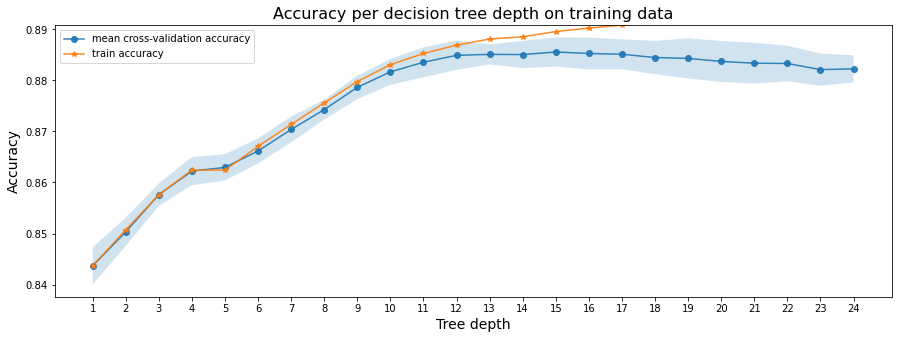

In [ ]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores,
                               'Accuracy per decision tree depth on training data')


# Multi-classification Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into features and target
X = df_modify_mul.drop('product_brand', axis=1)
y = df_modify_mul['product_brand']

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Multi-classification Model -- Logistic Regression

In [ ]:
# Build the model using Logistic Regression with one-vs-all strategy
model_lr = LogisticRegression(multi_class='ovr')
model_lr.fit(X_train, y_train)

# Predict the test data
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model using F1 score
from sklearn.metrics import f1_score
score_lr = f1_score(y_test, y_pred_lr, average='weighted')
print('F1 score:', score_lr)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

F1 score: 0.8372097433336912


In [ ]:
## Evaluate the average F1 score based on 10 folds cross-validation

from sklearn.model_selection import cross_val_score

# Define the logistic regression model
model_lr_cv = LogisticRegression(multi_class='ovr')

# Perform 10-fold cross-validation and calculate F1 score
f1_scores_lr_cv = cross_val_score(model_lr_cv, X, y, cv=10, scoring='f1_micro')

# Print the average F1 score
print("Average F1 score:", f1_scores_lr_cv.mean())

C:\Users\88609\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\88609\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Average F1 score: 0.7509925793460506


C:\Users\88609\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


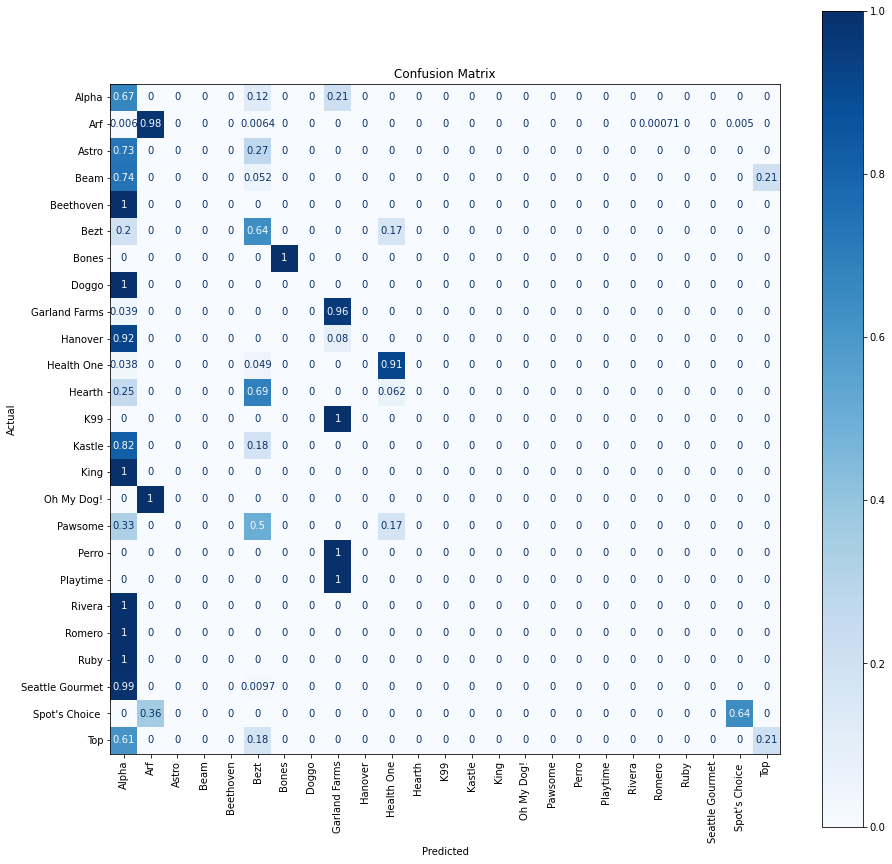

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))  # set the figure size
plot_confusion_matrix(model_lr, X_test, y_test, normalize="true", ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.xticks(rotation=90)
plt.ylabel('Actual')
plt.show()

Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, f1_score
import matplotlib.pyplot as plt

# Fit the decision tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Predict the test set
y_pred_dt = model_dt.predict(X_test)

score_dt = f1_score(y_test, y_pred_dt, average='weighted')
print('F1 score:', score_dt)


F1 score: 1.0


In [ ]:
## Since F1 score is 1.0, use 10 folds cross-validation to check the average F1 score

from sklearn.model_selection import cross_val_score

# Define the decision tree model
model_dt_cv = DecisionTreeClassifier()

# Perform 10-fold cross-validation and calculate F1 score
f1_scores_dt_cv = cross_val_score(model_dt_cv, X, y, cv=10, scoring='f1_micro')

# Print the average F1 score
print("Average F1 score:", f1_scores_dt_cv.mean())

Average F1 score: 0.9777641277641278


C:\Users\88609\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


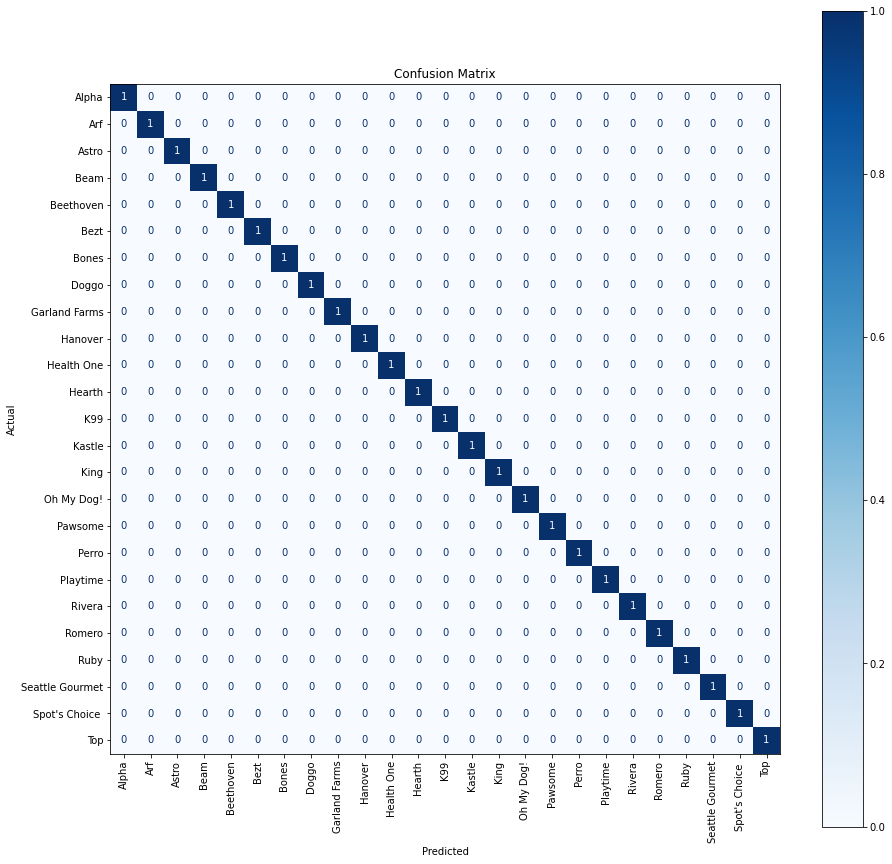

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))  # set the figure size
plot_confusion_matrix(model_dt, X_test, y_test, normalize="true", ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.xticks(rotation=90)
plt.ylabel('Actual')
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Define the Naive Bayes model
model_nb = MultinomialNB()

model_nb.fit(X_train, y_train)

# Predict the test set
y_pred_nb = model_nb.predict(X_test)

score_nb = f1_score(y_test, y_pred_nb, average='weighted')
print('F1 score:', score_nb)

F1 score: 0.062454874695874386


In [ ]:
## Evaluate the average F1 score based on 10 folds cross-validation
from sklearn.model_selection import cross_val_score

# Define the Naive Bayes model
model_nb_cv = MultinomialNB()

# Perform 10-fold cross-validation and calculate F1 score
f1_scores_nb_cv = cross_val_score(model_nb_cv, X, y, cv=10, scoring='f1_micro')

# Print the average F1 score
print("Average F1 score:", f1_scores_nb_cv.mean())

Average F1 score: 0.04138269578572671


C:\Users\88609\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


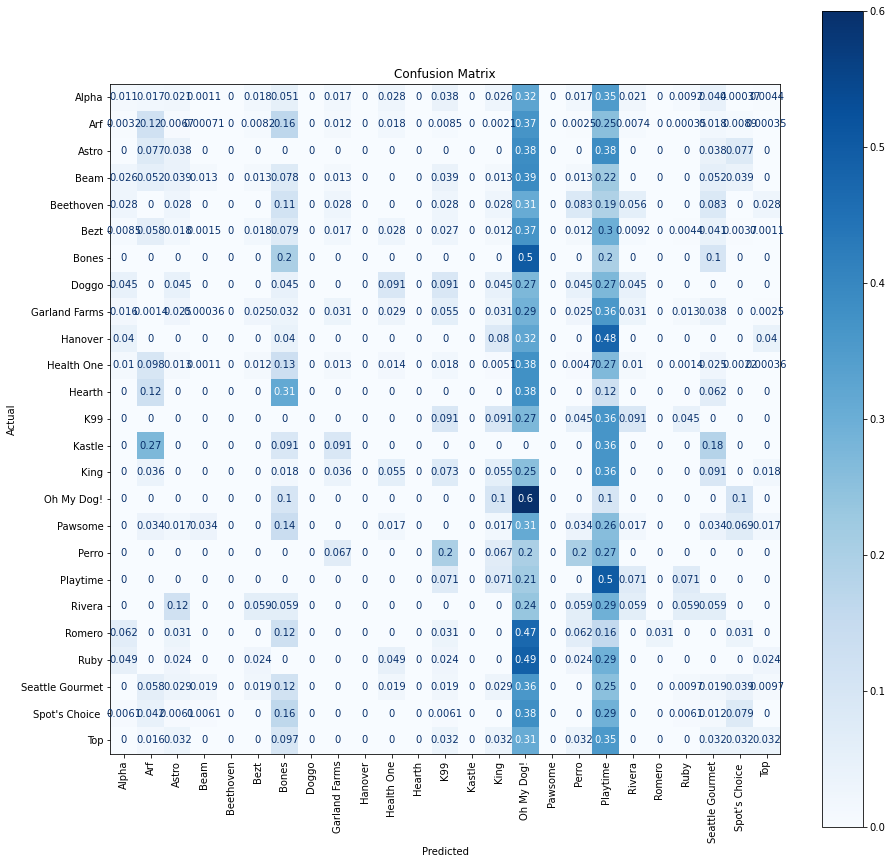

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))  # set the figure size
plot_confusion_matrix(model_nb, X_test, y_test, normalize="true", ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.xticks(rotation=90)
plt.ylabel('Actual')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

# Predict the test set
y_pred_rf = model_rf.predict(X_test)

score_rf = f1_score(y_test, y_pred_rf, average='weighted')
print('F1 score:', score_rf)

F1 score: 0.949251506083702


In [ ]:
## Evaluate the average F1 score based on 10 folds cross-validation
from sklearn.model_selection import cross_val_score

# Define the Random Forest model
model_rf_cv = RandomForestClassifier()

# Perform 10-fold cross-validation and calculate F1 score
f1_scores_rf_cv = cross_val_score(model_rf_cv, X, y, cv=10, scoring='f1_micro')

# Print the average F1 score
print("Average F1 score:", f1_scores_rf_cv.mean())

Average F1 score: 0.430281838258492


C:\Users\88609\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


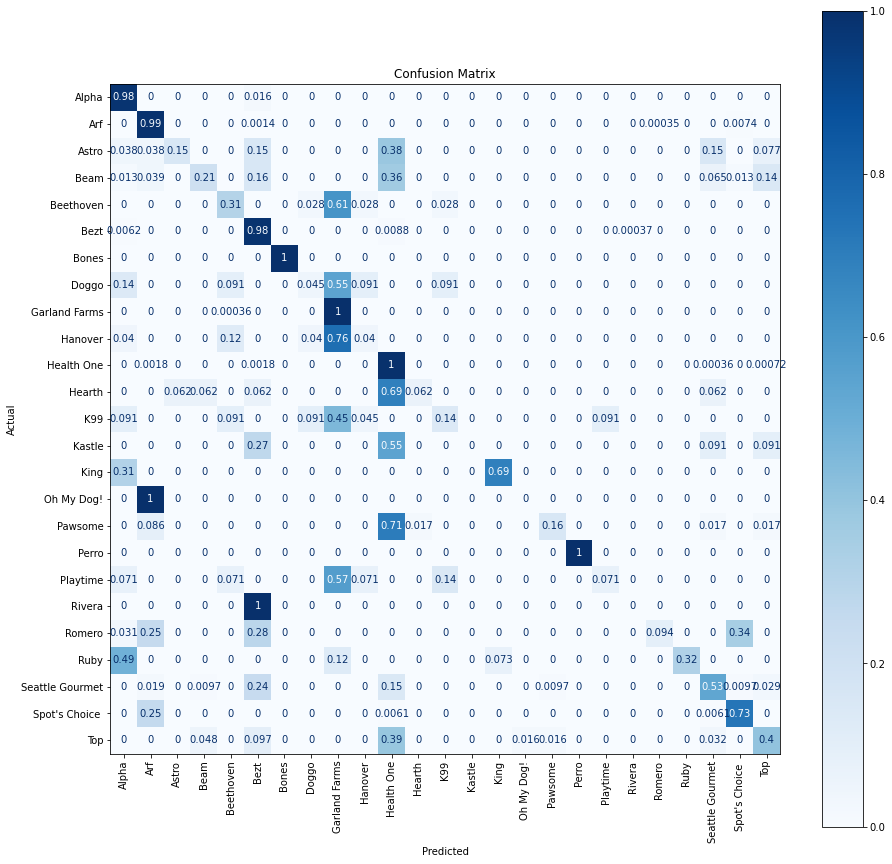

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))  # set the figure size
plot_confusion_matrix(model_rf, X_test, y_test, normalize="true", ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.xticks(rotation=90)
plt.ylabel('Actual')
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Define the KNN model
model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)

# Predict the test set
y_pred_knn = model_knn.predict(X_test)

score_knn = f1_score(y_test, y_pred_knn, average='weighted')
print('F1 score:', score_knn)

F1 score: 0.19021627869388957


In [ ]:
## Evaluate the average F1 score based on 10 folds cross-validation
from sklearn.model_selection import cross_val_score

# Define the KNN model
model_knn_cv = KNeighborsClassifier()

# Perform 10-fold cross-validation and calculate F1 score
f1_scores_knn_cv = cross_val_score(model_knn_cv, X, y, cv=10, scoring='f1_micro')

# Print the average F1 score
print("Average F1 score:", f1_scores_knn_cv.mean())

Average F1 score: 0.06708251546465759


C:\Users\88609\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


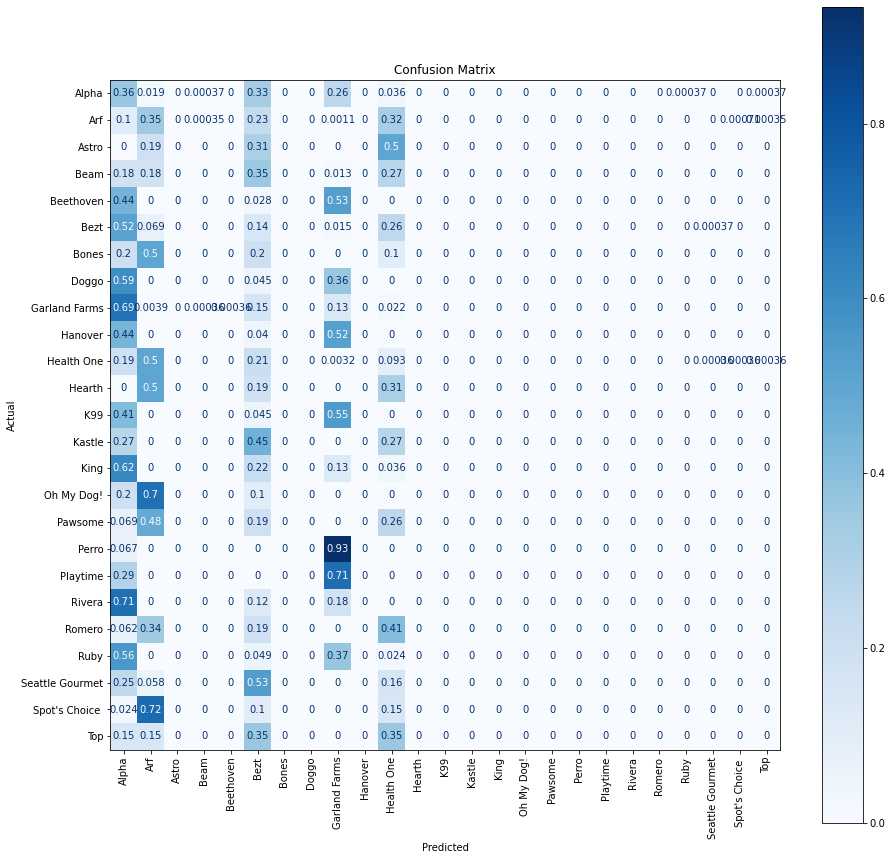

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))  # set the figure size
plot_confusion_matrix(model_knn, X_test, y_test, normalize="true", ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.xticks(rotation=90)
plt.ylabel('Actual')
plt.show()

# Score Result

In [ ]:
# print the score of each model
scores = {'Logistic':f1_scores_lr_cv.mean(),
          'Decision Tree': f1_scores_dt_cv.mean(),
          'Naive Bayes': f1_scores_nb_cv.mean(),
          'Random Forest': f1_scores_rf_cv.mean(),
          'KNN': f1_scores_knn_cv.mean()}

sorted_scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}

for k, v in sorted_scores.items():
    print(f'{k}: {v}')

Decision Tree: 0.9777641277641278
Logistic: 0.7509925793460506
Random Forest: 0.430281838258492
KNN: 0.06708251546465759
Naive Bayes: 0.04138269578572671
